In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
BASE = "/content/drive/MyDrive/Main Dataset Hybrid"

In [ ]:
!cp -r "/content/drive/MyDrive/Main Dataset Hybrid/classifier_dataset" /content/


In [ ]:
!cp -r "/content/drive/MyDrive/Main Dataset Hybrid/tilapia_yolo_cleaned" /content/


In [ ]:
!pip install -q ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.3 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!cat "$BASE/tilapia_yolo_cleaned/data.yaml"


path: /content/yolo_dataset
train: train/images
val: valid/images

nc: 1
names: ['disease']


In [ ]:
%%writefile "/content/drive/MyDrive/Main Dataset Hybrid/tilapia_yolo_cleaned/data.yaml"
path: /content/drive/MyDrive/Main Dataset Hybrid/tilapia_yolo_cleaned

train: /content/drive/MyDrive/Main Dataset Hybrid/tilapia_yolo_cleaned/train/images
val: /content/drive/MyDrive/Main Dataset Hybrid/tilapia_yolo_cleaned/valid/images

nc: 1
names: ['disease']

Overwriting /content/drive/MyDrive/Main Dataset Hybrid/tilapia_yolo_cleaned/data.yaml


In [ ]:
!cat "/content/drive/MyDrive/Main Dataset Hybrid/tilapia_yolo_cleaned/data.yaml"

path: /content/drive/MyDrive/Main Dataset Hybrid/tilapia_yolo_cleaned

train: /content/drive/MyDrive/Main Dataset Hybrid/tilapia_yolo_cleaned/train/images
val: /content/drive/MyDrive/Main Dataset Hybrid/tilapia_yolo_cleaned/valid/images

nc: 1
names: ['disease']


In [ ]:
!rm -rf /root/.cache/ultralytics

In [ ]:
from ultralytics import YOLO

yolo = YOLO("yolov8n.pt")

yolo.train(
    data="/content/drive/MyDrive/Main Dataset Hybrid/tilapia_yolo_cleaned/data.yaml",
    epochs=50,
    imgsz=640,
    batch=16,
    device=0
)

Ultralytics 8.3.240 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Main Dataset Hybrid/tilapia_yolo_cleaned/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patienc

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7de92fcc50a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
!ls runs/detect/

train


In [ ]:
!ls runs/detect/train/weights

best.pt  last.pt


In [ ]:
from ultralytics import YOLO

yolo = YOLO("runs/detect/train/weights/best.pt")

In [ ]:
yolo(
    f"{BASE}/tilapia_yolo_cleaned/valid/images",
    conf=0.15,
    save=True
)


image 1/147 /content/drive/MyDrive/Main Dataset Hybrid/tilapia_yolo_cleaned/valid/images/1-104-_jpg.rf.69f58da4d3f698cde81f281acd4b6e4b.jpg: 640x640 1 disease, 16.2ms
image 2/147 /content/drive/MyDrive/Main Dataset Hybrid/tilapia_yolo_cleaned/valid/images/1-110-_jpg.rf.dddf0b4dd7b7b750487eb1fbffbfbb84.jpg: 640x640 1 disease, 35.6ms
image 3/147 /content/drive/MyDrive/Main Dataset Hybrid/tilapia_yolo_cleaned/valid/images/1-12-_jpg.rf.b657d405e8bb156ac0467822045949f1.jpg: 640x640 1 disease, 7.4ms
image 4/147 /content/drive/MyDrive/Main Dataset Hybrid/tilapia_yolo_cleaned/valid/images/1-141-_jpg.rf.5a5f27ab01bb1a91ca7cedcdc8c8d89f.jpg: 640x640 1 disease, 7.3ms
image 5/147 /content/drive/MyDrive/Main Dataset Hybrid/tilapia_yolo_cleaned/valid/images/1-143-_jpg.rf.2546d8cb6df9b9dd233978f2f9ab6b7a.jpg: 640x640 4 diseases, 7.3ms
image 6/147 /content/drive/MyDrive/Main Dataset Hybrid/tilapia_yolo_cleaned/valid/images/1-146-_jpg.rf.c0ef68891ba74cce518b9f723b4279cf.jpg: 640x640 1 disease, 7.3ms
i

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'disease'}
 obb: None
 orig_img: array([[[127, 132, 131],
         [128, 133, 132],
         [129, 134, 133],
         ...,
         [ 75,  79,  80],
         [ 78,  82,  83],
         [ 80,  84,  85]],
 
        [[126, 131, 130],
         [127, 132, 131],
         [128, 133, 132],
         ...,
         [ 74,  78,  79],
         [ 77,  81,  82],
         [ 79,  83,  84]],
 
        [[125, 130, 129],
         [126, 131, 130],
         [127, 132, 131],
         ...,
         [ 75,  79,  80],
         [ 78,  82,  83],
         [ 79,  83,  84]],
 
        ...,
 
        [[253, 255, 255],
         [253, 255, 255],
         [253, 255, 255],
         ...,
         [254, 254, 254],
         [253, 253, 253],
         [252, 252, 252]],
 
        [[253, 255, 255],
         [253, 255, 255],
         [253, 255, 255],
         ...,
         [254, 25

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

In [ ]:
from torchvision.models import EfficientNet_B0_Weights
weights = EfficientNet_B0_Weights.DEFAULT

train_tfms = transforms.Compose([
    transforms.Resize((380,380)),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomRotation(15),
    transforms.RandomAffine(
        degrees=0,
        translate=(0.08,0.08),
        scale=(0.9,1.1)
    ),
    transforms.ColorJitter(0.25,0.25,0.25,0.03),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=weights.transforms().mean,
        std=weights.transforms().std
    )
])

val_tfms = transforms.Compose([
    transforms.Resize((380,380)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=weights.transforms().mean,
        std=weights.transforms().std
    )
])

In [ ]:
BASE = "/content/drive/MyDrive/Main Dataset Hybrid"

In [ ]:
import os, random, shutil

BASE = "/content/drive/MyDrive/Main Dataset Hybrid/classifier_dataset"

CLASSES = ["healthy", "diseased"]
SPLITS = {"train": 0.7, "val": 0.15, "test": 0.15}

random.seed(42)

for cls in CLASSES:
    src_dir = os.path.join(BASE, cls)
    images = os.listdir(src_dir)
    random.shuffle(images)

    n = len(images)
    t1 = int(SPLITS["train"] * n)
    t2 = int((SPLITS["train"] + SPLITS["val"]) * n)

    split_map = {
        "train": images[:t1],
        "val": images[t1:t2],
        "test": images[t2:]
    }

    for split, files in split_map.items():
        dst = os.path.join(BASE, split, cls)
        os.makedirs(dst, exist_ok=True)

        for f in files:
            shutil.move(
                os.path.join(src_dir, f),
                os.path.join(dst, f)
            )

    os.rmdir(src_dir)


In [ ]:
!ls "/content/drive/MyDrive/Main Dataset Hybrid/classifier_dataset/train"
!ls "/content/drive/MyDrive/Main Dataset Hybrid/classifier_dataset/val"
!ls "/content/drive/MyDrive/Main Dataset Hybrid/classifier_dataset/test"

diseased  healthy
diseased  healthy
diseased  healthy


In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

In [ ]:
from torchvision.models import EfficientNet_B0_Weights
weights = EfficientNet_B0_Weights.DEFAULT

train_tfms = transforms.Compose([
    transforms.Resize((380,380)),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomRotation(15),
    transforms.ColorJitter(0.25,0.25,0.25,0.03),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=weights.transforms().mean,
        std=weights.transforms().std
    )
])

val_tfms = transforms.Compose([
    transforms.Resize((380,380)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=weights.transforms().mean,
        std=weights.transforms().std
    )
])

In [ ]:
BASE = "/content/drive/MyDrive/Main Dataset Hybrid"

train_ds = datasets.ImageFolder(
    f"{BASE}/classifier_dataset/train", transform=train_tfms
)
val_ds = datasets.ImageFolder(
    f"{BASE}/classifier_dataset/val", transform=val_tfms
)

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=16)

In [ ]:
print(train_ds.class_to_idx)
# {'healthy': 0, 'diseased': 1}

{'diseased': 0, 'healthy': 1}


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = models.efficientnet_b0(weights=weights)
model.classifier[1] = nn.Linear(
    model.classifier[1].in_features, 2
)
model = model.to(device)

# 🔒 Freeze backbone (CRITICAL)
for param in model.features.parameters():
    param.requires_grad = False


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


100%|██████████| 20.5M/20.5M [00:00<00:00, 62.2MB/s]


In [ ]:
class_weights = torch.tensor([1.0, 1.3]).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)

optimizer = torch.optim.AdamW(
    model.parameters(),
    lr=3e-4,
    weight_decay=1e-4
)

In [ ]:
import os
from PIL import Image

BASE = "/content/drive/MyDrive/Main Dataset Hybrid/classifier_dataset"

def remove_broken_images(root_dir):
    broken = []
    for root, _, files in os.walk(root_dir):
        for file in files:
            if file.lower().endswith((".jpg", ".jpeg", ".png")):
                path = os.path.join(root, file)
                try:
                    with Image.open(path) as img:
                        img.verify()
                except Exception:
                    broken.append(path)

    for b in broken:
        print("Removing broken file:", b)
        os.remove(b)

    print(f"\n✅ Removed {len(broken)} broken images")

remove_broken_images(BASE)


✅ Removed 0 broken images


In [ ]:
from torchvision import datasets
from torch.utils.data import DataLoader

train_ds = datasets.ImageFolder(
    f"{BASE}/train", transform=train_tfms
)
val_ds = datasets.ImageFolder(
    f"{BASE}/val", transform=val_tfms
)

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=16)

print(train_ds.class_to_idx)

{'diseased': 0, 'healthy': 1}


In [ ]:
from torchvision.datasets import ImageFolder

class OrderedImageFolder(ImageFolder):
    def find_classes(self, directory):
        classes = ['healthy', 'diseased']  # FORCE ORDER
        class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
        return classes, class_to_idx

In [ ]:
BASE = "/content/drive/MyDrive/Main Dataset Hybrid/classifier_dataset"

train_ds = OrderedImageFolder(
    f"{BASE}/train", transform=train_tfms
)
val_ds = OrderedImageFolder(
    f"{BASE}/val", transform=val_tfms
)
test_ds = OrderedImageFolder(
    f"{BASE}/test", transform=val_tfms
)

from torch.utils.data import DataLoader

train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=16)
test_loader  = DataLoader(test_ds, batch_size=16)

In [ ]:
print(train_ds.class_to_idx)

{'healthy': 0, 'diseased': 1}


In [ ]:
class_weights = torch.tensor([1.0, 1.3]).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)

In [ ]:
from torchvision import models
import torch.nn as nn

model = models.efficientnet_b0(weights=weights)
model.classifier[1] = nn.Linear(
    model.classifier[1].in_features, 2
)
model = model.to(device)

for param in model.features.parameters():
    param.requires_grad = False

In [ ]:
for epoch in range(5):
    model.train()
    running_loss = 0

    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            preds = model(imgs).argmax(1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_acc = correct / total
    print(f"Epoch {epoch+1}/5 | Train Loss: {running_loss:.4f} | Val Acc: {val_acc:.4f}")

Epoch 1/5 | Train Loss: 109.9230 | Val Acc: 0.4858
Epoch 2/5 | Train Loss: 109.5792 | Val Acc: 0.4707
Epoch 3/5 | Train Loss: 109.3993 | Val Acc: 0.4726
Epoch 4/5 | Train Loss: 109.4056 | Val Acc: 0.4688
Epoch 5/5 | Train Loss: 109.3969 | Val Acc: 0.4669


In [ ]:
# Unfreeze last 2 feature blocks
for param in model.features[-2:].parameters():
    param.requires_grad = True

In [ ]:
optimizer = torch.optim.AdamW(
    model.parameters(),
    lr=1e-4,          # LOWER LR
    weight_decay=1e-4
)

In [ ]:
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='max',
    factor=0.5,
    patience=2
)


In [ ]:
current_lr = optimizer.param_groups[0]['lr']
print(f"Current LR: {current_lr:.6f}")

Current LR: 0.000100


In [ ]:
best_val = 0

for epoch in range(10):
    model.train()
    running_loss = 0

    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Validation
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for imgs, labels in val_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            preds = model(imgs).argmax(1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_acc = correct / total
    scheduler.step(val_acc)

    current_lr = optimizer.param_groups[0]['lr']

    print(
        f"Epoch {epoch+1}/10 | "
        f"Train Loss: {running_loss:.4f} | "
        f"Val Acc: {val_acc:.4f} | "
        f"LR: {current_lr:.6f}"
    )

    if val_acc > best_val:
        best_val = val_acc
        torch.save(model.state_dict(), "best_cnn.pt")

Epoch 1/10 | Train Loss: 37.4388 | Val Acc: 0.9735 | LR: 0.000100
Epoch 2/10 | Train Loss: 14.9503 | Val Acc: 0.9849 | LR: 0.000100
Epoch 3/10 | Train Loss: 7.4219 | Val Acc: 0.9905 | LR: 0.000100
Epoch 4/10 | Train Loss: 4.8643 | Val Acc: 0.9924 | LR: 0.000100
Epoch 5/10 | Train Loss: 4.0909 | Val Acc: 0.9924 | LR: 0.000100
Epoch 6/10 | Train Loss: 2.3107 | Val Acc: 0.9924 | LR: 0.000100
Epoch 7/10 | Train Loss: 2.2298 | Val Acc: 0.9924 | LR: 0.000050
Epoch 8/10 | Train Loss: 1.8463 | Val Acc: 0.9943 | LR: 0.000050
Epoch 9/10 | Train Loss: 1.5277 | Val Acc: 0.9924 | LR: 0.000050
Epoch 10/10 | Train Loss: 1.2446 | Val Acc: 0.9924 | LR: 0.000050


In [ ]:
model.load_state_dict(torch.load("best_cnn.pt"))
model.eval()


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_true = []
y_pred = []

with torch.no_grad():
    for imgs, labels in test_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)

        outputs = model(imgs)
        preds = outputs.argmax(1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())


In [ ]:
print(classification_report(
    y_true,
    y_pred,
    target_names=["Healthy", "Diseased"]
))


              precision    recall  f1-score   support

     Healthy       0.99      1.00      1.00       269
    Diseased       1.00      0.99      1.00       260

    accuracy                           1.00       529
   macro avg       1.00      1.00      1.00       529
weighted avg       1.00      1.00      1.00       529



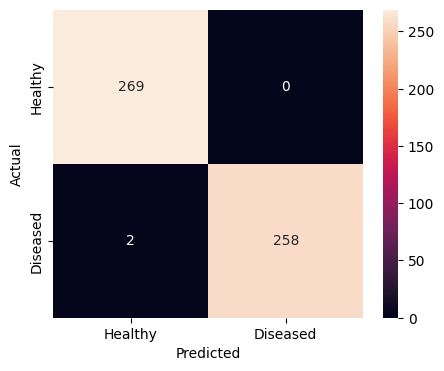

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=["Healthy","Diseased"],
            yticklabels=["Healthy","Diseased"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from ultralytics import YOLO

yolo = YOLO("runs/detect/train/weights/best.pt")


In [ ]:
from PIL import Image

def hybrid_predict(image_path, yolo_conf=0.15):
    # YOLO step (high-precision trigger)
    yolo_res = yolo(image_path, conf=yolo_conf)[0]

    if len(yolo_res.boxes) > 0:
        return 1  # Diseased

    # CNN step (global judge)
    img = Image.open(image_path).convert("RGB")
    img = val_tfms(img).unsqueeze(0).to(device)

    with torch.no_grad():
        pred = model(img).argmax(1).item()

    return pred  # 0 = Healthy, 1 = Diseased


In [ ]:
from sklearn.metrics import classification_report

y_true_hybrid = []
y_pred_hybrid = []

for img_path, label in test_ds.samples:
    y_true_hybrid.append(label)
    y_pred_hybrid.append(hybrid_predict(img_path))

print(classification_report(
    y_true_hybrid,
    y_pred_hybrid,
    target_names=["Healthy", "Diseased"]
))



image 1/1 /content/drive/MyDrive/Main Dataset Hybrid/classifier_dataset/test/diseased/106_jpg.rf.a110f1db69df0e6e32ac8e4070ca8c71.jpg: 640x640 2 diseases, 10.3ms
Speed: 3.5ms preprocess, 10.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Main Dataset Hybrid/classifier_dataset/test/diseased/10_jpg.rf.40506714cabb3dcdfa58671e8c2cf0fa.jpg: 640x640 2 diseases, 9.9ms
Speed: 2.9ms preprocess, 9.9ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Main Dataset Hybrid/classifier_dataset/test/diseased/112_jpg.rf.1c115de184f0a4c3241eb77eb6735a3c.jpg: 640x640 1 disease, 7.4ms
Speed: 2.9ms preprocess, 7.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Main Dataset Hybrid/classifier_dataset/test/diseased/114_jpg.rf.890b6636914337d69095c50054e824e2.jpg: 640x640 (no detections), 7.6ms
Speed: 3.1ms preprocess, 7.6ms inference, 0.7ms postprocess

In [ ]:
from sklearn.metrics import classification_report

for conf in [0.10, 0.15, 0.20, 0.25]:
    y_true_h, y_pred_h = [], []

    for img_path, label in test_ds.samples:
        y_true_h.append(label)
        y_pred_h.append(hybrid_predict(img_path, yolo_conf=conf))

    print(f"\nYOLO confidence = {conf}")
    print(classification_report(
        y_true_h,
        y_pred_h,
        target_names=["Healthy", "Diseased"]
    ))


Streaming output truncated to the last 5000 lines.

image 1/1 /content/drive/MyDrive/Main Dataset Hybrid/classifier_dataset/test/healthy/Telapiya472.jpg: 640x640 (no detections), 7.4ms
Speed: 3.8ms preprocess, 7.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Main Dataset Hybrid/classifier_dataset/test/healthy/Telapiya473.jpg: 640x640 (no detections), 9.1ms
Speed: 3.7ms preprocess, 9.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Main Dataset Hybrid/classifier_dataset/test/healthy/Telapiya480.jpg: 640x640 (no detections), 10.8ms
Speed: 4.9ms preprocess, 10.8ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Main Dataset Hybrid/classifier_dataset/test/healthy/Telapiya49.jpg: 640x640 (no detections), 11.9ms
Speed: 3.7ms preprocess, 11.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/

In [ ]:
def hybrid_predict(image_path, yolo_conf=0.20, min_area=0.02):
    yolo_res = yolo(image_path, conf=yolo_conf)[0]

    for box in yolo_res.boxes:
        x1,y1,x2,y2 = box.xyxy[0]
        area = (x2-x1)*(y2-y1)
        img_area = yolo_res.orig_shape[0] * yolo_res.orig_shape[1]

        if area / img_area > min_area:
            return 1  # Diseased

    # CNN fallback
    img = Image.open(image_path).convert("RGB")
    img = val_tfms(img).unsqueeze(0).to(device)

    with torch.no_grad():
        return model(img).argmax(1).item()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_true_final = []
y_pred_final = []

for img_path, label in test_ds.samples:
    y_true_final.append(label)
    y_pred_final.append(
        hybrid_predict(img_path, yolo_conf=0.20, min_area=0.02)
    )

print(classification_report(
    y_true_final,
    y_pred_final,
    target_names=["Healthy", "Diseased"]
))



image 1/1 /content/drive/MyDrive/Main Dataset Hybrid/classifier_dataset/test/diseased/106_jpg.rf.a110f1db69df0e6e32ac8e4070ca8c71.jpg: 640x640 2 diseases, 10.2ms
Speed: 3.4ms preprocess, 10.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Main Dataset Hybrid/classifier_dataset/test/diseased/10_jpg.rf.40506714cabb3dcdfa58671e8c2cf0fa.jpg: 640x640 2 diseases, 7.3ms
Speed: 2.1ms preprocess, 7.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Main Dataset Hybrid/classifier_dataset/test/diseased/112_jpg.rf.1c115de184f0a4c3241eb77eb6735a3c.jpg: 640x640 (no detections), 7.3ms
Speed: 2.6ms preprocess, 7.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Main Dataset Hybrid/classifier_dataset/test/diseased/114_jpg.rf.890b6636914337d69095c50054e824e2.jpg: 640x640 (no detections), 7.3ms
Speed: 2.6ms preprocess, 7.3ms inference, 0.6ms postp

In [ ]:
torch.save(model.state_dict(), "final_cnn.pt")


In [ ]:
!pip install -q gradio ultralytics


In [ ]:
import torch
from ultralytics import YOLO
from PIL import Image
import random
import os
import gradio as gr


In [ ]:
# Device
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load YOLO
yolo = YOLO("runs/detect/train/weights/best.pt")

# Load CNN
model.load_state_dict(torch.load("final_cnn.pt", map_location=device))
model.eval()
model.to(device)


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

In [ ]:
def hybrid_predict_app(image, yolo_conf=0.20, min_area=0.02):
    image = image.convert("RGB")

    # Save temp image (YOLO needs path)
    temp_path = "temp.jpg"
    image.save(temp_path)

    # YOLO step
    yolo_res = yolo(temp_path, conf=yolo_conf)[0]

    for box in yolo_res.boxes:
        x1, y1, x2, y2 = box.xyxy[0]
        area = (x2 - x1) * (y2 - y1)
        img_area = yolo_res.orig_shape[0] * yolo_res.orig_shape[1]

        if area / img_area > min_area:
            return "🦠 Diseased (YOLO detected visible disease)"

    # CNN fallback
    img_tensor = val_tfms(image).unsqueeze(0).to(device)
    with torch.no_grad():
        pred = model(img_tensor).argmax(1).item()

    if pred == 1:
        return "🦠 Diseased (CNN detected subtle disease)"
    else:
        return "✅ Healthy (CNN decision)"


In [ ]:
TEST_DIR = "/content/drive/MyDrive/Main Dataset Hybrid/classifier_dataset/test"

def random_test():
    cls = random.choice(["healthy", "diseased"])
    folder = os.path.join(TEST_DIR, cls)
    img_name = random.choice(os.listdir(folder))
    img_path = os.path.join(folder, img_name)

    image = Image.open(img_path).convert("RGB")
    prediction = hybrid_predict_app(image)

    return image, f"True label: {cls.upper()}\nPrediction: {prediction}"


In [ ]:
with gr.Blocks() as demo:
    gr.Markdown("## 🐟 Tilapia Disease Detection – Hybrid YOLO + CNN")
    gr.Markdown("Upload an image or test a random sample from dataset.")

    with gr.Row():
        image_input = gr.Image(type="pil", label="Upload Fish Image")
        output_text = gr.Textbox(label="Prediction")

    predict_btn = gr.Button("🔍 Predict")
    predict_btn.click(
        fn=hybrid_predict_app,
        inputs=image_input,
        outputs=output_text
    )

    gr.Markdown("---")

    gr.Markdown("### 🎲 Test Random Image from Dataset")
    random_btn = gr.Button("🎯 Test Random Image")
    random_image = gr.Image(label="Random Test Image")
    random_output = gr.Textbox(label="Result")

    random_btn.click(
        fn=random_test,
        outputs=[random_image, random_output]
    )

demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f7d72ae886de039f4c.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
!mkdir -p "/content/drive/MyDrive/Main Dataset Hybrid/models"


In [ ]:
!cp runs/detect/train/weights/best.pt \
"/content/drive/MyDrive/Main Dataset Hybrid/models/yolo_best.pt"


In [ ]:
!cp final_cnn.pt \
"/content/drive/MyDrive/Main Dataset Hybrid/models/cnn_final.pt"


In [ ]:
!ls "/content/drive/MyDrive/Main Dataset Hybrid/models"


cnn_final.pt  yolo_best.pt



🚀 RUNNING COMPLETE PROJECT EVALUATION 🚀

image 1/1 /content/temp.jpg: 640x640 (no detections), 25.2ms
Speed: 5.8ms preprocess, 25.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

================ CNN ONLY RESULTS ================

              precision    recall  f1-score   support

     Healthy       0.99      1.00      1.00       269
    Diseased       1.00      0.99      1.00       260

    accuracy                           1.00       529
   macro avg       1.00      1.00      1.00       529
weighted avg       1.00      1.00      1.00       529

CNN Test Accuracy: 0.9962


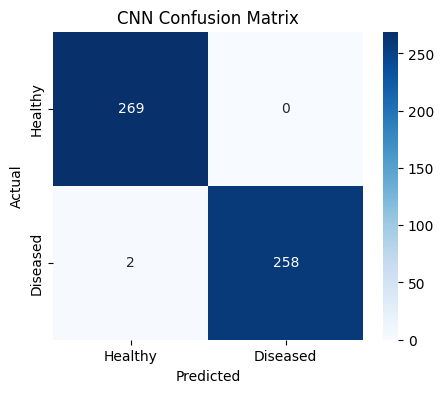


image 1/1 /content/drive/MyDrive/Main Dataset Hybrid/classifier_dataset/test/diseased/106_jpg.rf.a110f1db69df0e6e32ac8e4070ca8c71.jpg: 640x640 2 diseases, 7.3ms
Speed: 2.1ms preprocess, 7.3ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Main Dataset Hybrid/classifier_dataset/test/diseased/10_jpg.rf.40506714cabb3dcdfa58671e8c2cf0fa.jpg: 640x640 2 diseases, 7.3ms
Speed: 2.6ms preprocess, 7.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Main Dataset Hybrid/classifier_dataset/test/diseased/112_jpg.rf.1c115de184f0a4c3241eb77eb6735a3c.jpg: 640x640 (no detections), 7.3ms
Speed: 2.6ms preprocess, 7.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/Main Dataset Hybrid/classifier_dataset/test/diseased/114_jpg.rf.890b6636914337d69095c50054e824e2.jpg: 640x640 (no detections), 7.2ms
Speed: 1.9ms preprocess, 7.2ms inference, 0.5ms postpro

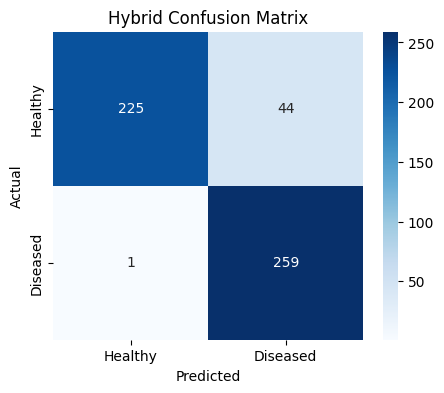


================ FINAL SUMMARY ================

CNN ONLY Accuracy     : 0.9962
HYBRID SYSTEM Accuracy: 0.9149

✔ Evaluation Complete


In [ ]:
# ==============================
# COMPLETE METRICS EVALUATION
# ==============================

import torch
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------------------
# 1. CNN-ONLY EVALUATION
# ------------------------------

def evaluate_cnn(model, test_loader, device):
    model.eval()
    y_true, y_pred = [], []

    with torch.no_grad():
        for imgs, labels in test_loader:
            imgs = imgs.to(device)
            labels = labels.to(device)

            outputs = model(imgs)
            preds = outputs.argmax(1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())

    print("\n================ CNN ONLY RESULTS ================\n")
    print(classification_report(
        y_true, y_pred,
        target_names=["Healthy", "Diseased"]
    ))

    acc = accuracy_score(y_true, y_pred)
    print(f"CNN Test Accuracy: {acc:.4f}")

    cm = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(cm, "CNN Confusion Matrix")

    return acc


# ------------------------------
# 2. HYBRID SYSTEM EVALUATION
# ------------------------------

def evaluate_hybrid(test_ds, hybrid_predict_fn):
    y_true, y_pred = [], []

    for img_path, label in test_ds.samples:
        y_true.append(label)
        y_pred.append(hybrid_predict_fn(img_path))

    print("\n================ HYBRID SYSTEM RESULTS ================\n")
    print(classification_report(
        y_true, y_pred,
        target_names=["Healthy", "Diseased"]
    ))

    acc = accuracy_score(y_true, y_pred)
    print(f"Hybrid System Accuracy: {acc:.4f}")

    cm = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(cm, "Hybrid Confusion Matrix")

    return acc


# ------------------------------
# 3. CONFUSION MATRIX PLOTTER
# ------------------------------

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5,4))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["Healthy", "Diseased"],
        yticklabels=["Healthy", "Diseased"]
    )
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()


# ------------------------------
# 4. RUN EVERYTHING AT ONCE
# ------------------------------

print("\n🚀 RUNNING COMPLETE PROJECT EVALUATION 🚀")

cnn_acc = evaluate_cnn(model, test_loader, device)
hybrid_acc = evaluate_hybrid(
    test_ds,
    lambda img: hybrid_predict(img, yolo_conf=0.20, min_area=0.02)
)

print("\n================ FINAL SUMMARY ================\n")
print(f"CNN ONLY Accuracy     : {cnn_acc:.4f}")
print(f"HYBRID SYSTEM Accuracy: {hybrid_acc:.4f}")

print("\n✔ Evaluation Complete")
